In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.graph_objects as go


sns.set_palette('Set3')

In [2]:
plt.rc('font', family = 'NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 1. 유저의 액세서리 선호도 분석  
  
  주요 가설
  1. 유저들은 재미 성향의 액세서리를 선호한다.  
    유저와 운영진 사이의 액세 성향은 괴리가 있다.  
  2. 재미와 성능 사이에는 상충관계가 있다.  
  3. 유저들은 평점이 높은 액세서리를 선호하는 경향이 있다.  
  4. 평점이 높은 액세서리일 수록 유저들이 많이 찾는다.  

### 계급 selecting

In [3]:
path = '/mnt/d/data/getamped/' # 절대경로

In [4]:
df = pd.read_csv(path + 'getamped_300.csv', index_col = 0)
df

,계급,액세서리
0,동황룡,"철장갑,파이어크로스,미스터리테트라,우리엘머누버,산타구두"
1,금청룡,"호루스의가면,키메라건틀릿,미스터리테트라,미스터리오브,미스터리큐브"
2,금청룡,"거합태도,무형검,연태도,오오덴타,그림펜듈럼"
3,은청룡,"아톰비트,트롤의팔,암레이저건,쌍권총,프로스트서번트"
4,은청룡,"거합태도,연태도,브르위프,오오덴타,플레어플레일"
...,...,...
295,은곰발,"헤라클레스의레이버즈,기간틱스매셔,용발톱,칠지도,사타닉스피릿"
296,은곰발,"볼테크기어,숄더윙,파이어크로스,진동벨트,스컬발디슈"
297,동곰발,"브로즈레이지,삐에로가면,아쿠아기어,어인의갈퀴,미사일포트"
298,동곰발,"트랜스볼,아크로니카소드,사신의장갑,댄싱햇,라이트서번트"


In [5]:
# 계급별 labeling
class_level = {
    '금황룡' : 0, '은황룡' : 1, '동황룡' : 2, '금청룡' : 3, '은청룡' : 4, '동청룡' : 5, '금백호' : 6, '은백호' : 7, '동백호' : 8, '금주작' : 9, '은주작' : 10,
       '동주작' : 11, '금현무' : 12, '은현무' : 13, '동현무' : 14, '금코발' : 15, '은코발' : 16, '동코발' : 17, '금곰발' : 18, '은곰발' : 19,
       '동곰발' : 20
}


df['계급_label'] = df['계급'].map(class_level)

df.head()

,계급,액세서리,계급_label
0,동황룡,"철장갑,파이어크로스,미스터리테트라,우리엘머누버,산타구두",2
1,금청룡,"호루스의가면,키메라건틀릿,미스터리테트라,미스터리오브,미스터리큐브",3
2,금청룡,"거합태도,무형검,연태도,오오덴타,그림펜듈럼",3
3,은청룡,"아톰비트,트롤의팔,암레이저건,쌍권총,프로스트서번트",4
4,은청룡,"거합태도,연태도,브르위프,오오덴타,플레어플레일",4


In [6]:
# level select
def levelselect(data, start = '동곰발', end = '동황룡'):

    if start == end:
        df = data.query(f'계급 == {start}')
        
    else:
        s = class_level.get(start)
        e = class_level.get(end)
        
        if s < e:
            df = data.query(f'계급_label >= {s} and 계급_label <= {e}')
        else:
            df = data.query(f'계급_label >= {e} and 계급_label <= {s}')
        
    df.reset_index(drop = True, inplace = True)
    return df


selected_data = levelselect(df, '동백호', '금백호')

selected_data.head()

,계급,액세서리,계급_label
0,금백호,"서브마린트랜스포머,라이트서번트,엽기양슈트,강염궁,견인포우르반",6
1,금백호,"파워클리너,미스터리오브,창현궁,미스터리큐브,천상의날개옷",6
2,금백호,"미스터리큐브,아크로니카소드,트랜스볼,악령의팔찌,로켓티어",6
3,금백호,"리치완드,폭파장갑,익스팬션암즈,사타닉스피릿,키메라건틀릿",6
4,금백호,"아라크네,브르위프,악마의날개,백사권,메두사의방패",6


In [7]:
# 계급 구간별 액세서리 사용 빈도 counting

def count_accessory(data, start_lv = '동곰발', end_lv = '동황룡'):
    sdf = levelselect(data, start_lv, end_lv)
    
    count = {}
    l = []
    for i in range(len(sdf)):
        l += sdf['액세서리'][i].split(',')

    for x in l:
        try:
            count[x] += 1
        except:
            count[x] = 1

    sort_count = sorted(count.items(), key = lambda x:x[1], reverse = True)

    accessory = []
    usedcount = []

    for x in sort_count:
        accessory.append(x[0])
        usedcount.append(x[1])
        
    avg_count = round(np.mean(usedcount))

    
    plt.figure(figsize = (10, 5))
    sns.barplot(y = accessory[:20], x = usedcount[:20], orient = 'h')
    plt.axvline(x = avg_count, color = 'lightgray', linestyle = '--')
    plt.title(f'{start_lv}~{end_lv} 주사용 액세서리')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 10)
    plt.show()
    
    return sort_count
# t = count_accessory(df, '동청룡', '금청룡')

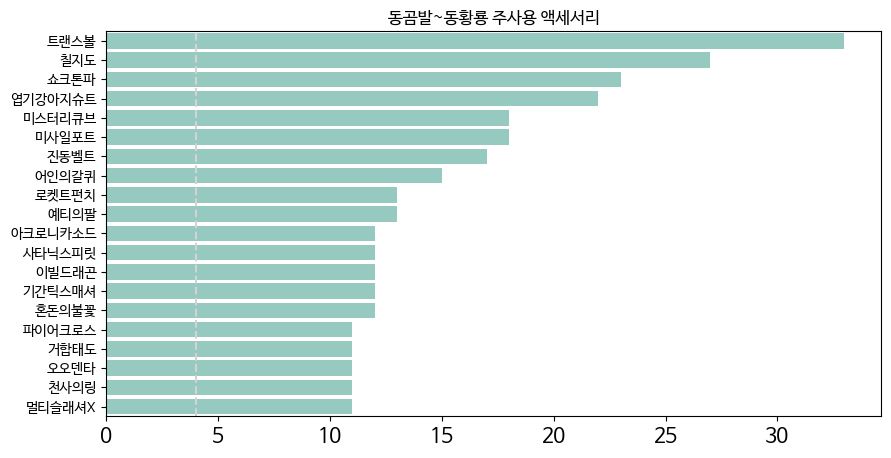

In [8]:
x = count_accessory(df)

### 액세서리 평점 추출 및 유저별 선호도 시각화

In [9]:
df_score = pd.read_csv(path + '겟앰상점악평점.csv', encoding = 'cp949').iloc[:,1:]
df_score.head()

,액세서리,외형,성능,재미
0,공수도플레임,8.8,9.2,9.5
1,황혼의달,9.3,8.5,8.5
2,프로즌글러브,8.8,8.9,8.8
3,봉인의지팡이(퍼플),5.8,7.8,6.2
4,아쿠아기어,9.5,9.7,9.7


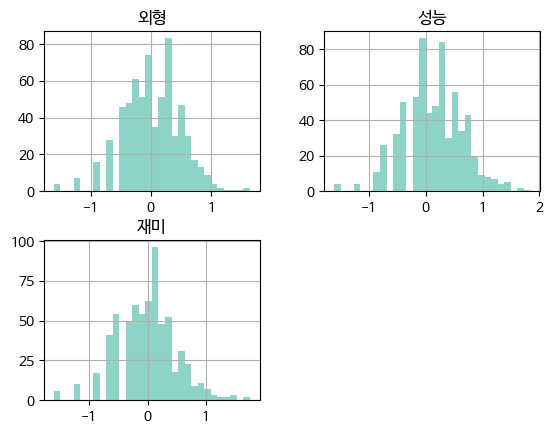

In [10]:
np.log(10.2 - df_score[['외형', '성능', '재미']]).hist(bins = 30)
plt.show()

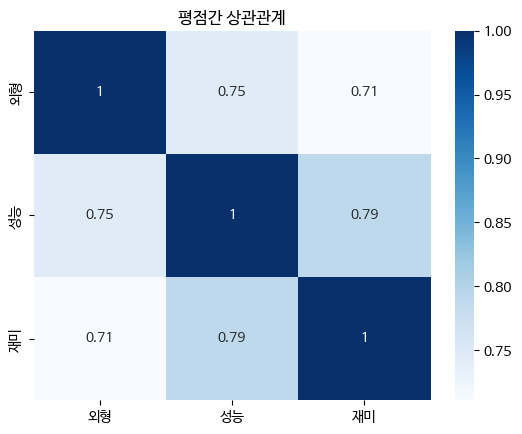

In [11]:
sns.heatmap(np.log(10.2 - df_score[['외형', '성능', '재미']]).corr(), cmap = 'Blues', annot = True)
plt.title('평점간 상관관계')
plt.show()

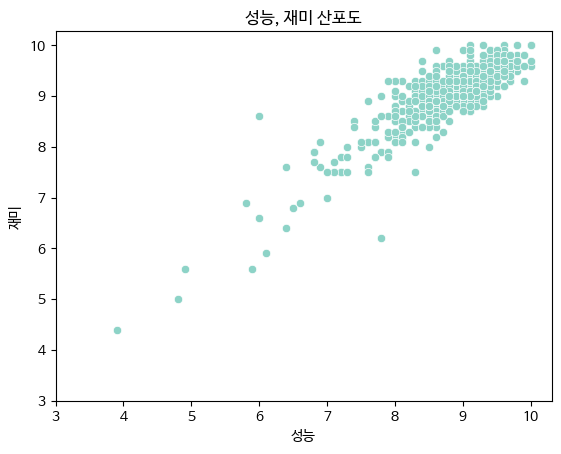

In [12]:
sns.scatterplot(data =df_score[['외형', '성능', '재미']], x = '성능', y = '재미')
plt.xticks(range(3,11))
plt.yticks(range(3,11))
plt.title('성능, 재미 산포도')
plt.show()

In [13]:
# 각 유저별 사용 액세서리에 따른 외형, 성능, 재미 평점 산출

df['외형'], df['성능'], df['재미'] = 0, 0, 0
for idx in range(len(df)):
    s_외형, s_성능, s_재미 = 0, 0, 0
    n = len(df['액세서리'][idx].split(','))
    for acc in df['액세서리'][idx].split(','):
        s_외형 += float(df_score.query(f'`액세서리` == "{acc}"')['외형'].values[0])
        s_성능 += float(df_score.query(f'`액세서리` == "{acc}"')['성능'].values[0])
        s_재미 += float(df_score.query(f'`액세서리` == "{acc}"')['재미'].values[0])
        
    df.loc[idx, '외형'] = round(s_외형/n, 3)
    df.loc[idx, '성능'] = round(s_성능/n, 3)
    df.loc[idx, '재미'] = round(s_재미/n, 3)
    
df.head()

/tmp/ipykernel_132659/2540473261.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.42' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[idx, '외형'] = round(s_외형/n, 3)
/tmp/ipykernel_132659/2540473261.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[idx, '성능'] = round(s_성능/n, 3)
/tmp/ipykernel_132659/2540473261.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[idx, '재미'] = round(s_재미/n, 3)


,계급,액세서리,계급_label,외형,성능,재미
0,동황룡,"철장갑,파이어크로스,미스터리테트라,우리엘머누버,산타구두",2,9.42,9.40,9.40
1,금청룡,"호루스의가면,키메라건틀릿,미스터리테트라,미스터리오브,미스터리큐브",3,9.42,9.50,9.38
2,금청룡,"거합태도,무형검,연태도,오오덴타,그림펜듈럼",3,9.52,9.30,9.32
3,은청룡,"아톰비트,트롤의팔,암레이저건,쌍권총,프로스트서번트",4,8.98,9.10,9.16
4,은청룡,"거합태도,연태도,브르위프,오오덴타,플레어플레일",4,9.34,9.08,9.18


In [14]:
df_score[['외형', '성능', '재미']].mean()

외형    9.035855
성능    8.868533
재미    9.065809
dtype: float64

In [15]:
df[['외형', '성능', '재미']].mean()

외형    9.191783
성능    9.157320
재미    9.232343
dtype: float64

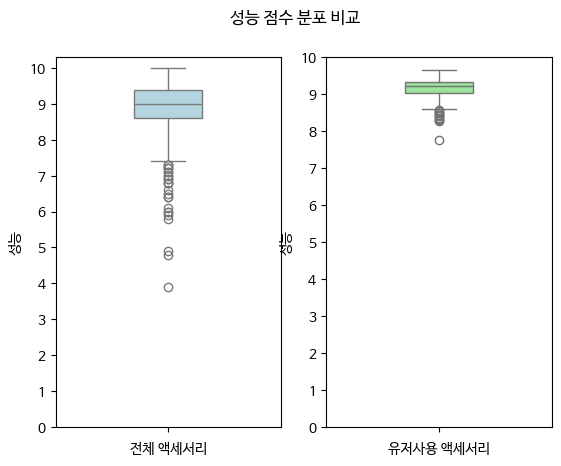

In [16]:
# plt.boxplot([df_score['성능'], df['성능']], labels = ['액세서리', '유저'])

fig, ax = plt.subplots(ncols = 2)

# 첫 번째 boxplot
sns.boxplot(data=df_score['성능'], color='lightblue', width=0.3, ax = ax[0])
ax[0].set_yticks(range(0, 11))
ax[0].set_xlabel('전체 액세서리')

# 두 번째 boxplot
sns.boxplot(data= df['성능'], color='lightgreen', width=0.3, ax = ax[1])
ax[1].set_yticks(range(0, 11))
ax[1].set_xlabel('유저사용 액세서리')

plt.suptitle('성능 점수 분포 비교')
plt.show()

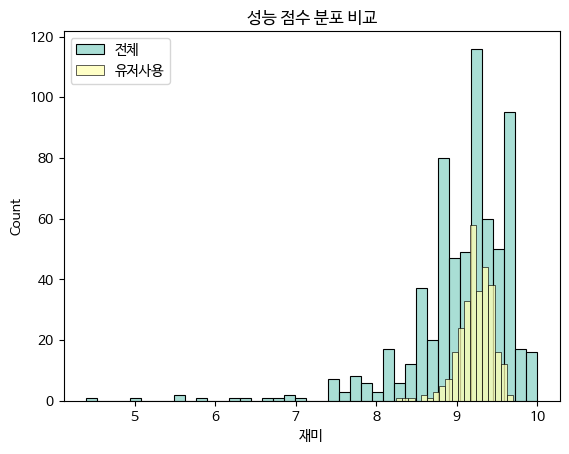

In [17]:
sns.histplot(df_score['재미'], label = '전체', stat = 'count')
sns.histplot(df['재미'], label = '유저사용', stat = 'count')

plt.legend()
plt.title('성능 점수 분포 비교')
plt.show()

In [18]:
acc = np.log(10.2 - df_score[['외형', '성능', '재미']])
user = np.log(10.2 - df[['외형', '성능', '재미']])

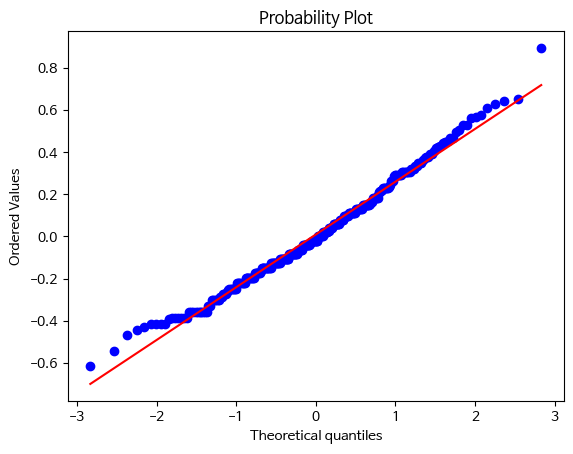

In [19]:
import scipy.stats as stats

stats.probplot(user['성능'], plot = plt)
plt.show()

In [20]:
from scipy.stats import bartlett

bartlett(acc['성능'], user['성능'])

BartlettResult(statistic=170.18655359073298, pvalue=6.73630047002665e-39)

In [26]:
from scipy import stats

# 천체 악세 성능 평균점수는 유저별 성능선호 점수 평균보다 크거나 같다 (귀무)
# 작다 ( 대립)
# p < 0.05 이면 귀무가설을 기각한다. 
t, p = stats.ttest_ind(acc['성능'], user['성능'], equal_var=False)

print('독립표본 단측검정 결과')
print('statistics t :' ,t, ',', 'p-value : ', p)

# 가설 설명
print('[H0] 전체 악세서리 성능 평균점수는 유저별 성능 선호 점수 평균과 같다')
print('[H1] 전체 악세서리 성능 평균점수는 유저별 성능 선호 점수 평균과 다르다.')

# 검정 결과 해석
if p < 0.05:
    print('p-value가 0.05보다 작으므로 H0를 기각한다.')
    print('전체 악세서리 성능 평균점수는 유저별 성능 선호 점수 평균과 다르다.')
else:
    print('p-value가 0.05보다 크므로 H0를 채택한다.')
    print('전체 악세서리 성능 평균점수는 유저별 성능 선호 점수 평균과 다르진 않다.')

독립표본 단측검정 결과
statistics t : 5.876939187339745 , p-value :  5.77011640329976e-09
[H0] 전체 악세서리 성능 평균점수는 유저별 성능 선호 점수 평균과 같다
[H1] 전체 악세서리 성능 평균점수는 유저별 성능 선호 점수 평균과 다르다.
p-value가 0.05보다 작으므로 H0를 기각한다.
전체 악세서리 성능 평균점수는 유저별 성능 선호 점수 평균과 다르다.


In [22]:
# Cohen's d 계산
mean_diff = acc['성능'].mean() - user['성능'].mean()
pooled_std = (((acc['성능'].std() ** 2) + (user['성능'].std() ** 2)) / 2) ** 0.5
cohens_d = mean_diff / pooled_std
print('효과 크기 (Cohen\'s d):', cohens_d)

효과 크기 (Cohen's d): 0.35854322616936163


In [23]:
from scipy import stats

# 천체 악세 성능 평균점수는 유저별 성능선호 점수 평균보다 크거나 같다 (귀무)
# 작다 ( 대립)
# p < 0.05 이면 귀무가설을 기각한다. 
t, p = stats.ttest_ind(acc['성능'], user['성능'], equal_var=False, alternative='less')

print('독립표본 단측검정 결과')
print('statistics t :' ,t, ',', 'p-value : ', p)

# 가설 설명
print('[H0] 전체 악세서리 성능 평균점수는 유저별 성능 선호 점수 평균보다 크거나 같다.')
print('[H1] 전체 악세서리 성능 평균점수는 유저별 성능 선호 점수 평균보다 작다.')

# 검정 결과 해석
if p < 0.05:
    print('p-value가 0.05보다 작으므로 H0를 기각한다.')
    print('전체 악세서리 성능 평균점수는 유저 성능 선호 평균점수보다 작다.')
else:
    print('p-value가 0.05보다 크므로 H0를 채택한다.')
    print('전체 악세서리 성능 평균점수가 유저 성능 선호 평균점수보다 크거나 같다고 할 수 있다.')

독립표본 단측검정 결과
statistics t : 5.876939187339745 , p-value :  0.9999999971149418
[H0] 전체 악세서리 성능 평균점수는 유저별 성능 선호 점수 평균보다 크거나 같다.
[H1] 전체 악세서리 성능 평균점수는 유저별 성능 선호 점수 평균보다 작다.
p-value가 0.05보다 크므로 H0를 채택한다.
전체 악세서리 성능 평균점수가 유저 성능 선호 평균점수보다 크거나 같다고 할 수 있다.


/tmp/ipykernel_16567/170048303.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['재미'], shade=True, label = '유저')
/tmp/ipykernel_16567/170048303.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_score['재미'], shade=True, label = '액세')


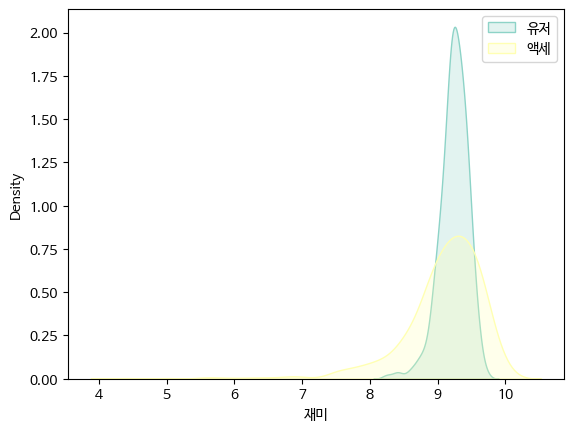

In [32]:
sns.kdeplot(df['재미'], shade=True, label = '유저')
sns.kdeplot(df_score['재미'], shade=True, label = '액세')
plt.legend()
plt.show()

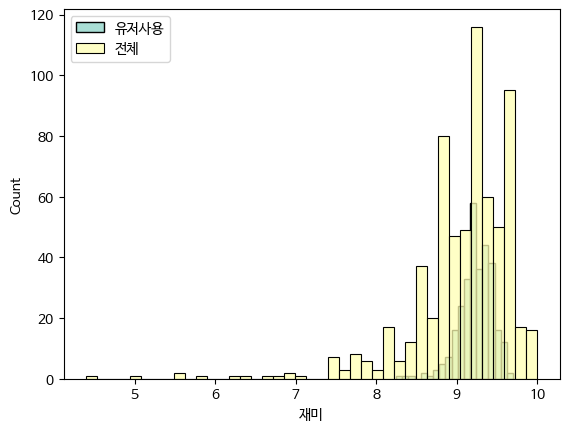

In [97]:
sns.histplot(df['재미'], label = '유저사용', stat = 'count')
sns.histplot(df_score['재미'], label = '전체', stat = 'count')

plt.legend()

3.0985287013255434


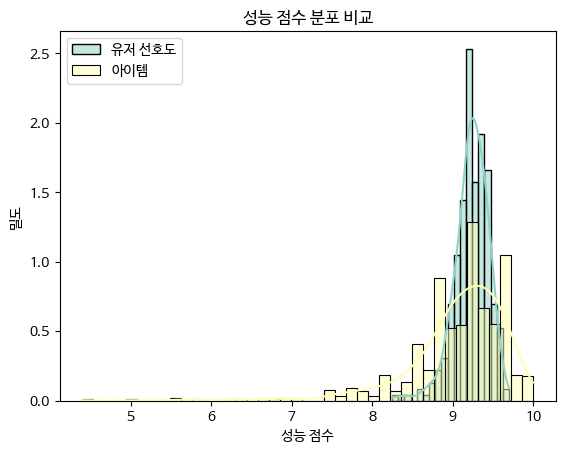

In [87]:
from scipy.stats import entropy

acc_hist, edges = np.histogram(df_score['재미'].to_list(), bins = 30, density = False)
user_hist, edges = np.histogram(df['재미'].to_list(), bins = 30, density = False)

eps = 1e-10
kl_div = entropy(acc_hist+eps, user_hist+eps)
print(kl_div)

sns.histplot(df['재미'], kde=True, label='유저 선호도', stat='density')
sns.histplot(df_score['재미'], kde=True, label='아이템', stat='density')

plt.legend()
plt.title('성능 점수 분포 비교')
plt.xlabel('성능 점수')
plt.ylabel('밀도')
plt.show()

# center = 0.5 * (edges[1:] + edges[:-1])
# plt.plot(center, user_hist, label='User Preference', color = 'blue')
# plt.plot(center, acc_hist, label='Item Performance', color ='red')

# plt.legend()
# plt.title('Performance Distribution Comparison')
# plt.show()


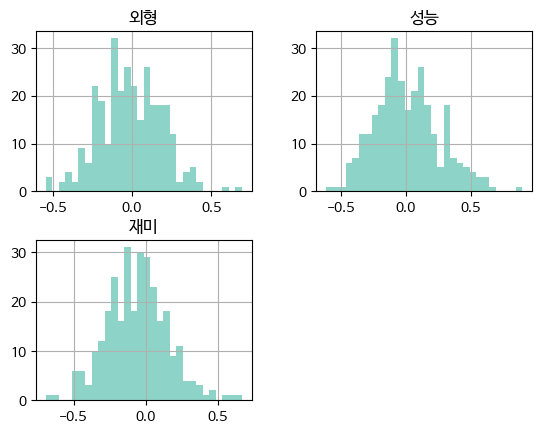

In [19]:
np.log(10.2 - df[['외형', '성능', '재미']]).hist(bins = 30)
plt.show()

In [20]:
new_df_score = pd.merge(df_score, pd.DataFrame(x, columns = ['액세서리', '빈도']), on = '액세서리', how = 'left').fillna(0)

In [21]:
new_df_score.query('`빈도` > 4')[['외형', '성능', '재미']].mean()

외형    9.278788
성능    9.251515
재미    9.291919
dtype: float64

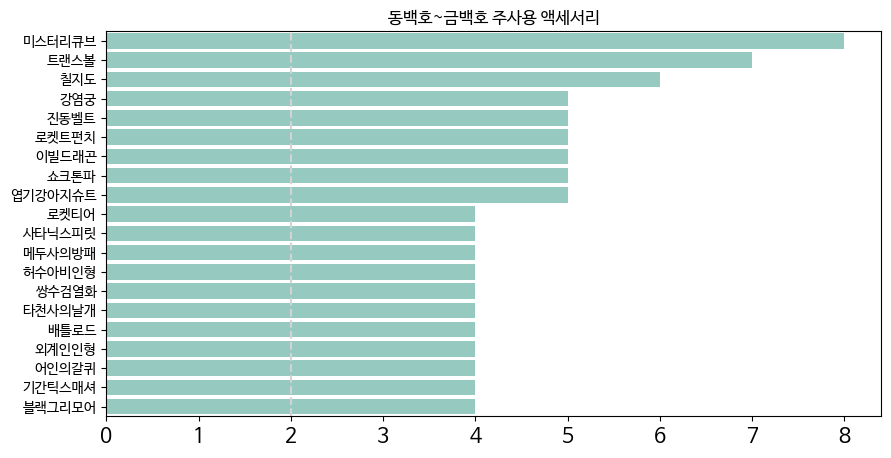

[('미스터리큐브', 8),
 ('트랜스볼', 7),
 ('칠지도', 6),
 ('강염궁', 5),
 ('진동벨트', 5),
 ('로켓트펀치', 5),
 ('이빌드래곤', 5),
 ('쇼크톤파', 5),
 ('엽기강아지슈트', 5),
 ('로켓티어', 4),
 ('사타닉스피릿', 4),
 ('메두사의방패', 4),
 ('허수아비인형', 4),
 ('쌍수검열화', 4),
 ('타천사의날개', 4),
 ('배틀로드', 4),
 ('외계인인형', 4),
 ('어인의갈퀴', 4),
 ('기간틱스매셔', 4),
 ('블랙그리모어', 4),
 ('혼돈의불꽃', 4),
 ('폭파장갑', 3),
 ('브르위프', 3),
 ('백사권', 3),
 ('가브리엘소드', 3),
 ('천사의링', 3),
 ('용발톱', 3),
 ('망령의건틀릿', 3),
 ('그림펜듈럼', 3),
 ('장풍팔찌', 3),
 ('멀티슬래셔X', 3),
 ('드레드아하트', 3),
 ('태권도세트(청팀)', 3),
 ('파멸의인형', 3),
 ('카자마진의글러브', 3),
 ('걀라르호른', 3),
 ('파이어브로우스렛', 3),
 ('거합태도', 3),
 ('연태도', 3),
 ('스타뱅글', 3),
 ('미사일포트', 3),
 ('이말년가방', 3),
 ('오크족토템망치', 3),
 ('사신의장갑', 3),
 ('스컬발디슈', 3),
 ('예티의팔', 3),
 ('블레이드', 3),
 ('미스터리오브', 2),
 ('천상의날개옷', 2),
 ('아크로니카소드', 2),
 ('악령의팔찌', 2),
 ('리치완드', 2),
 ('익스팬션암즈', 2),
 ('키메라건틀릿', 2),
 ('광전사의가면', 2),
 ('이그니션블릿', 2),
 ('골든글레이브', 2),
 ('벨제부브', 2),
 ('무기파괴갑옷', 2),
 ('탐과젤리', 2),
 ('시그너스윙', 2),
 ('타이거건틀릿', 2),
 ('프로스트엠프레스', 2),
 ('실버비하인드', 2),
 ('특공무술세트(빨강)', 2),
 ('질풍십

In [22]:
count_accessory(df, '동백호', '금백호')

In [ ]:
levelselect(df, '동청룡')

,계급,액세서리,계급_label,외형,성능,재미
0,동황룡,"철장갑,파이어크로스,미스터리테트라,우리엘머누버,산타구두",2,9.420,9.400,9.400
1,금청룡,"호루스의가면,키메라건틀릿,미스터리테트라,미스터리오브,미스터리큐브",3,9.420,9.500,9.380
2,금청룡,"거합태도,무형검,연태도,오오덴타,그림펜듈럼",3,9.520,9.300,9.320
3,은청룡,"아톰비트,트롤의팔,암레이저건,쌍권총,프로스트서번트",4,8.980,9.100,9.160
4,은청룡,"거합태도,연태도,브르위프,오오덴타,플레어플레일",4,9.340,9.080,9.180
5,은청룡,"플레어부스터,걀라르호른,잭-트리트,망령의건틀릿,슈퍼호넷해머",4,9.140,9.040,9.200
6,동청룡,"라이트서번트,미스터리오브,채리엇액스,어인의갈퀴,타이거건틀릿",5,9.260,9.160,9.040
7,동청룡,"아크로니카소드,판타즘스텝,우리엘머누버,프로스트서번트,강염궁",5,9.180,8.940,9.100
8,동청룡,"플레이트아머,열대과일바구니,오뚝이메카,탈로스의갑옷,슈퍼옵시디언",5,9.040,8.860,9.060
9,금청룡,"아크로니카소드,라바보우,미사일포트,타이거건틀릿,리버스필드",3,9.380,9.420,9.180


In [ ]:
new_df_score.head(20)

,액세서리,외형,성능,재미,빈도
0,공수도플레임,8.8,9.2,9.5,1.0
1,황혼의달,9.3,8.5,8.5,0.0
2,프로즌글러브,8.8,8.9,8.8,0.0
3,봉인의지팡이(퍼플),5.8,7.8,6.2,0.0
4,아쿠아기어,9.5,9.7,9.7,6.0
5,듀얼펜서,7.6,6.1,5.9,0.0
6,콜로서스피스트,9.3,9.3,9.7,0.0
7,스파클브로우스렛,9.5,9.6,9.4,9.0
8,크로노셉터,8.5,8.3,8.1,0.0
9,마그넷아머,9.2,8.9,9.1,3.0


In [18]:
# 평점 정보가 몰려있으므로 min-max normalization을 활용해 분포 scaling 및 radar chart 시각화
def normalization(arr):
    max_v = arr.max()
    min_v = arr.min()
    
    return (arr - min_v)/(max_v - min_v)

def radarchart(normalized_v, title):
    trace = go.Scatterpolar(r = normalized_v,
                        theta = ['외형', '성능', '재미'],
                        fill = 'toself')

    layout = go.Layout(title = title)

    fig = go.Figure(data = trace, layout = layout)
    fig.update_layout(polar = dict(radialaxis = dict(visible = True,
                                                    tickvals = [0, 0.5, 1],
                                                    ticktext = ['low', 'medium', 'high'])), showlegend = False)

    fig.show()

In [19]:
radarchart(normalization(df[['외형', '성능', '재미']].mean().values), '전체 유저 성향도')

In [20]:
radarchart(normalization(levelselect(df, '동청룡', '금황룡')[['외형', '성능', '재미']].mean().values), '청룡 계급 성향도')

In [21]:
radarchart(normalization(levelselect(df, '동백호', '금백호')[['외형', '성능', '재미']].mean().values), '백호 계급 성향도')

In [22]:
radarchart(normalization(levelselect(df, '동현무', '금주작')[['외형', '성능', '재미']].mean().values), '현무~주작 계급 성향도') 

In [23]:
radarchart(normalization(levelselect(df, '동곰발', '금코발')[['외형', '성능', '재미']].mean().values), '곰발~코발 계급 성향도') 

In [25]:
radarchart(normalization(df_score.iloc[:10,:][['외형', '성능', '재미']].mean().values), '최근 출시한 10개 액세서리의 평점 성향도') 